# Comparison of 21gmj with other SNe II and between 21gmj LCOGT/Berkeley phot with ZTF

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import glob,os

In [2]:
path = os.getcwd()+'/'
llpath = path+'LLSNe/'

lldf = pd.read_csv(llpath+'LL_expds_hand.csv')
lldf

,name,expd,expderr,type,ref,mu,z,host
0,1997D,2450367.5,40.0,s,2003MNRAS.338..711Z,30.74,0.0040,NGC 1536
1,1999br,2451277.0,4.0,n,2004MNRAS.347...74P,30.97,0.0030,NGC 4900
2,2002gd,2452553.0,4.0,s,2014ApJ...786...67A,32.87,0.0070,NGC 7537
3,2002gw,2452560.0,4.0,s,2014ApJ...786...67A,32.98,0.0100,NGC 922
4,2003B,2452617.0,11.0,s,2014ApJ...786...67A,31.11,0.0040,NGC 1097
5,2003fb,2452777.0,6.0,s,2014ApJ...786...67A,34.43,0.0170,UGC 11522
6,2003Z,2452664.0,4.5,n,2003IAUC.8062....1R,31.70,0.0060,NGC 2742
7,2004fx,2453309.5,3.0,n,2004IAUC.8431....2P,32.82,0.0090,MCG -02-14-003
8,2005cs,2453549.5,1.0,n,2017MNRAS.467..369S/2006MNRAS.370.1752P,29.46,0.0010,M51
9,2007aa,2454136.3,5.0,s,2014ApJ...786...67A,31.95,0.0050,NGC 4030


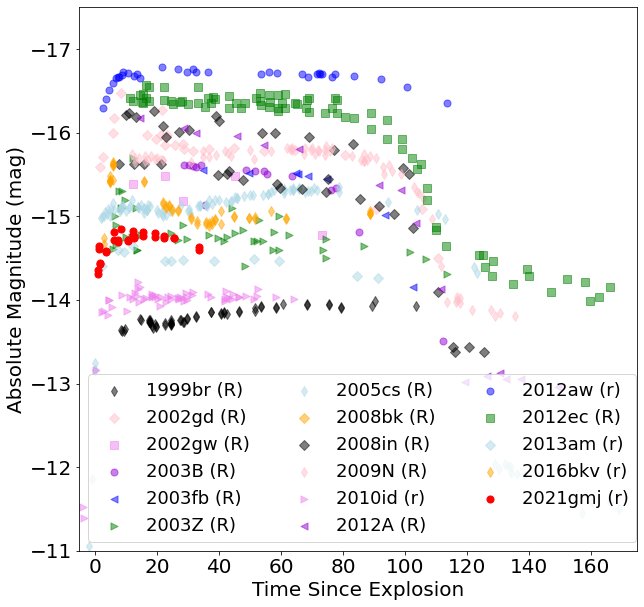

In [5]:
colors = ['black','pink','violet','darkviolet','blue','green','lightblue','orange']
markers = ['d','D','s','o','<','>','d','D']
markersReverse = markers[::-1]
for i in range(len(colors)):
    colors.append(colors[i])
    markers.append(markersReverse[i])
    
plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size': 20})
colorInd = 0
for ind, row in lldf.iterrows():
    sn = row['name']
    expd = row['expd']
    distance = row['mu']
    
    if sn != '1997D':
        photdf = pd.read_csv(llpath+'phot/'+sn+'.csv')
        #print(photdf)
        
        bands = set(photdf['band'].values)
        if 'r' in bands:
            plt.scatter(photdf[(photdf['band'] == 'r')]['time']-(expd-2400000.5),
                        photdf[(photdf['band'] == 'r')]['magnitude']-distance,
                        label=sn+' (r)',alpha=0.50,marker=markers[colorInd],color=colors[colorInd],s=50)
            colorInd = colorInd+1
        elif 'R' in bands:
            plt.scatter(photdf[(photdf['band'] == 'R')]['time']-(expd-2400000.5),
                        photdf[(photdf['band'] == 'R')]['magnitude']-distance,
                        label=sn+' (R)',alpha=0.50,marker=markers[colorInd],color=colors[colorInd],s=50)
            colorInd = colorInd+1
            
# 21gmj
gmjDistance = 30.5
gmjExpd = 2459293.32
lcodf = pd.read_csv(path+'/phot/2021gmj_nonsub.txt',delimiter=r'\s+')
plt.scatter(lcodf[(lcodf['filter']=='r')]['jd']-gmjExpd,lcodf[(lcodf['filter']=='r')]['mag']-gmjDistance,
            color='red',marker='o',label='2021gmj (r)',s=50)
    
plt.ylim([-11,-17.5])
plt.xlim([-5,175])
plt.ylabel('Absolute Magnitude (mag)')
plt.xlabel('Time Since Explosion')
plt.legend(ncol=3,fontsize=18)

plt.savefig(path+'figures/phot_compare.png',format='png',dpi=300)
plt.show()

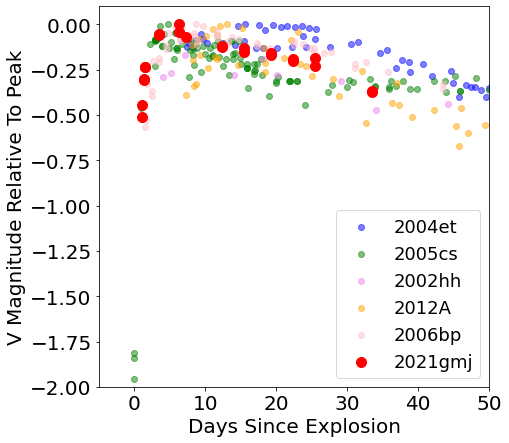

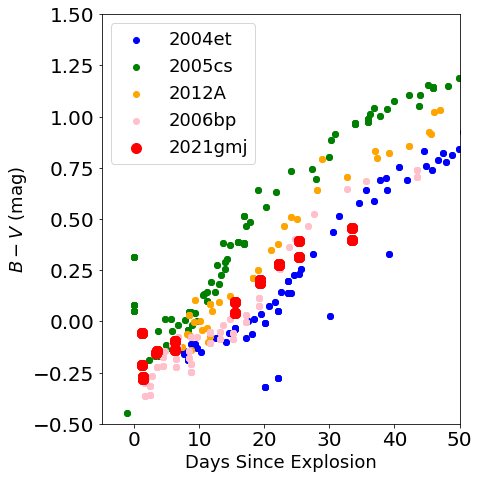

In [6]:
expd = {'2002hh': 2452576.5, '2004et': 2453270.5, '2005cs': 2453549.5, '2006bp': 2453834.5, '2012A': 2455928.9}
ebv = {'2002hh': 1.67, '2004et': 0.1174, '2005cs': 0.015, '2006bp': 0.4, '2012A': 0.009}
ebvg = {'2002hh': 0.2904, '2004et': 0.2926, '2005cs': 0.0314, '2006bp': 0.0259, '2012A': 0.0274}
colors = ['blue','green','violet','orange','pink']

df = pd.read_csv(path+'/phot/similarSNe.csv')
sne = list(set(df.name))

# other SNe
plt.figure(figsize=(7,7))
ax1 = plt.axes()
plt.figure(figsize=(7,7))
ax2 = plt.axes()
matplotlib.rcParams.update({'font.size': 18})
i = 0
for sn in sne:
    tdf = df[(df['name']==sn)&(df['filter']=='V')]
    if sn == '2004et':
        tdf = tdf[(tdf['source']==90)]
    x = tdf['jd'].values - expd[sn]
    y, yerr = tdf['mag'].values, tdf['magerr'].values
    ax1.scatter(x,min(y)-y,label=sn,alpha=0.5,color=colors[i])
    
    tdf = df[(df['name']==sn)]
    labeled = 0
    for jd in tdf['jd']:
        cdf = tdf[(tdf['jd']>=jd-0.1) & (tdf['jd']<=jd+0.1)]
        for source in list(set(cdf['source'])):
            vdf = cdf[(cdf['source']==source)&(cdf['filter']=='V')]
            bdf = cdf[(cdf['source']==source)&(cdf['filter']=='B')]
            x = vdf['jd'].values - expd[sn]
            vy, vyerr = vdf['mag'].values, vdf['magerr'].values
            by, byerr = bdf['mag'].values, bdf['magerr'].values
            if len(x)==len(by)==len(vy):
                if labeled:
                    ax2.scatter(x,by-vy-ebv[sn]-ebvg[sn],color=colors[i])
                if not labeled:
                    ax2.scatter(x,by-vy-ebv[sn]-ebvg[sn],color=colors[i],label=sn)
                    labeled = 1
    i += 1

# 21gmj
gmjDistance = 30.5
gmjExpd = 2459293.3
gmj_ebvg = 0.0192
lcodf = pd.read_csv('/Users/sfdavis/projects/SN2021gmj/phot/2021gmj_nonsub.txt',delimiter='\s+')
ax1.scatter(lcodf[(lcodf['filter']=='V')]['jd']-gmjExpd,
            min(lcodf[(lcodf['filter']=='V')]['mag'])-lcodf[(lcodf['filter']=='V')]['mag'],
            color='red',marker='o',label='2021gmj',s=100)

labeled = 0
for jd in lcodf['jd']:
    cdf = lcodf[(lcodf['jd']>=jd-0.1) & (lcodf['jd']<=jd+0.1)]
    vdf = cdf[(cdf['filter']=='V')]
    bdf = cdf[(cdf['filter']=='B')]
    x = vdf['jd'].values - gmjExpd
    vy, vyerr = vdf['mag'].values, vdf['dmag'].values
    by, byerr = bdf['mag'].values, bdf['dmag'].values
    if len(x)==len(by)==len(vy):
        if not labeled:
            ax2.scatter(x,by-vy-gmj_ebvg,color='red',s=100,label='2021gmj')
            labeled = 1
        else:
            ax2.scatter(x,by-vy-gmj_ebvg,color='red',s=100)

ax1.set_xlim([-5,50])
ax1.set_ylim([-2,0.1])
ax1.set_xlabel('Days Since Explosion')
ax1.set_ylabel('V Magnitude Relative To Peak')
ax1.legend()

ax2.set_xlim([-5,50])
ax2.set_ylim([-0.5,1.5])
ax2.set_xlabel('Days Since Explosion',fontsize=18)
ax2.set_ylabel(r'$B-V$ (mag)',fontsize=18)
ax2.legend()
plt.tight_layout()
plt.savefig(path+'figures/color_compare.png',format='png',dpi=300)
plt.show()

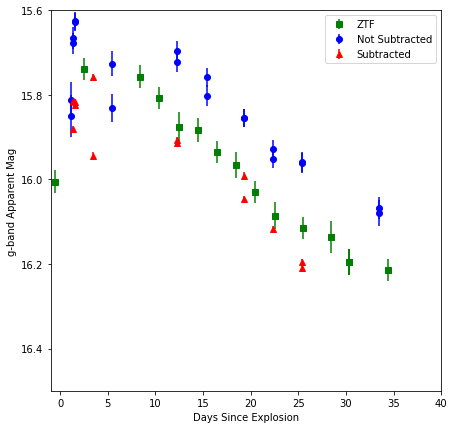

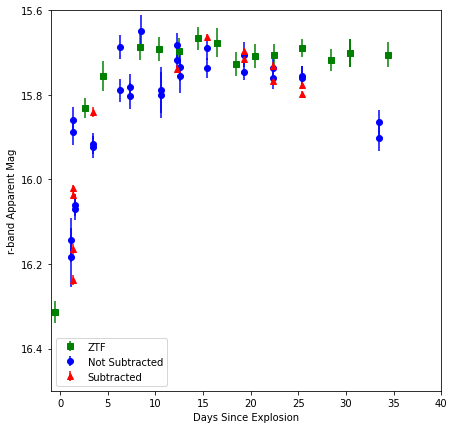

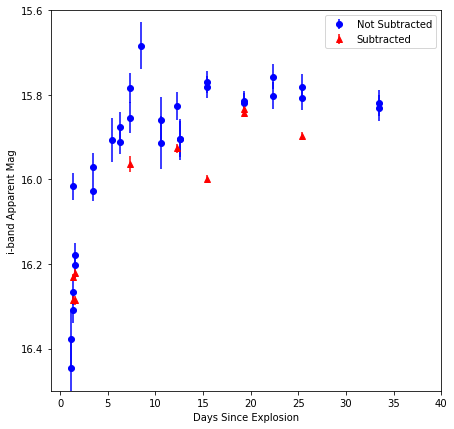

In [51]:
gmjExpd = 2459293.3
gmjMJD = 59293.8
nsdf = pd.read_csv('/home/dustspeck/Downloads/SN2021gmj/SN2021gmj/phot/2021gmj_nonsub.txt',delimiter='\s+')
sdf = pd.read_csv('/home/dustspeck/Downloads/SN2021gmj/SN2021gmj/phot/2021gmj_sub.txt',delimiter='\s+')
filters = ['g','r','i']

import requests
import json
url = 'https://lasair.roe.ac.uk/object/ZTF21aaqgmjt/json/'
d = requests.get(url).json()
# fid = 1 is g; fid = 2 is r
ztf_filt = {'g': 1, 'r': 2,'i':3}

for filt in filters:
    plt.figure(figsize=(7,7))
    vns = nsdf[(nsdf['filter']==filt)]
    vs = sdf[(sdf['filter']==filt)]
    i = 0 
    if filt == 'g' or filt == 'r' or filt == 'i':
        for x in filter(lambda x: 'sigmapsf' in x.keys() and x['fid']==ztf_filt[filt], d['candidates']):    
            if i==0:
                plt.errorbar(x['mjd']-gmjMJD,x['magpsf'],yerr=x['sigmapsf'],color='green',fmt='s',label='ZTF')
            else:
                plt.errorbar(x['mjd']-gmjMJD,x['magpsf'],yerr=x['sigmapsf'],color='green',fmt='s')
            i+=1
    plt.errorbar(vns['jd']-gmjExpd,vns['mag'],yerr=vns['dmag'],fmt='o',color='blue',label='Not Subtracted')
    plt.errorbar(vs['jd']-gmjExpd,vs['mag'],yerr=vs['dmag'],fmt='^',color='red',label='Subtracted')

    
    plt.xlabel('Days Since Explosion')
    plt.ylabel(filt+'-band Apparent Mag')
    plt.xlim([-1,40])
    plt.ylim([16.5,15.6])
    plt.legend()
    plt.show()